In [3]:
import numpy as np
from pyhms import (
    hms,
    EALevelConfig,
    CMALevelConfig,
    DemeTree,
    DontStop,
    MetaepochLimit,
    FunctionProblem,
    EvalCutoffProblem,
    FitnessEvalLimitReached,
    get_NBC_sprout,
)

DEFAULT_CENTERS = np.array([[-5.0, -5.0], [5.0, 5.0], [-5.0, 5.0], [5.0, -5.0]])


class FunnelProblem:
    def __init__(self, centers: np.ndarray | None = DEFAULT_CENTERS):
        self.centers = centers

    def __call__(self, x: np.ndarray) -> float:
        return np.min([np.sum((x - center) ** 2) for center in self.centers])


fitness_function = FunnelProblem()

bounds = np.array([[-10.0, 10.0]] * 2)

eval_cutoff = 1100
problem = FunctionProblem(
    fitness_function=fitness_function,
    bounds=bounds,
    maximize=False,
)
problem_with_cutoff = EvalCutoffProblem(
    decorated_problem=problem,
    eval_cutoff=eval_cutoff,
)

level_config = [
    EALevelConfig(
        generations=1,
        problem=problem_with_cutoff,
        pop_size=50,
        lsc=DontStop(),
    ),
    CMALevelConfig(
        generations=5,
        problem=problem_with_cutoff,
        lsc=MetaepochLimit(10),
    ),
]

hms_tree: DemeTree = hms(
    level_config=level_config,
    gsc=FitnessEvalLimitReached(limit=eval_cutoff),
    sprout_cond=get_NBC_sprout(),
    options={"random_seed": 42}
)

hms_tree.plot_population(
    show_grid=True, show_all_individuals=True, filepath="hms_tree.eps", show_scale=False
)

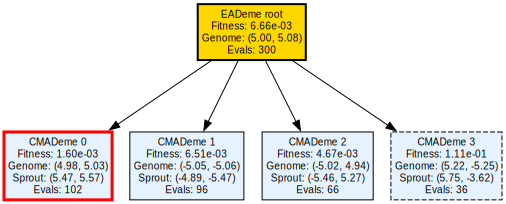

In [4]:
hms_tree.tree_diagram(output_path="hms_tree_diagram", format="eps")